In [1]:
"""
Created By    : Clay Wooton
Creation Date : 28 November 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #03 - Statistical Objective Analysis

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using statistical objective analysis.

Through the use of Barnes analysis we created a background field. Using 
this background field, we were able to use statistical objective analysis
to perform three different analyses. Each analysis varied in the number of
observation stations that were used. The three analyses used the 
closest 2, 4 and 10 observation stations.

Additionally, we calculated the three analysis increment fields as well as 
the analysis differences at each station. Finally, we calculated the root 
mean square differences between analysis values and observations at the
observation stations. 

"""
__author__    = "Clay Wooton"
__contact__   = "claiborne.wooton@und.edu"

In [2]:
#Import Modules

import pandas as pd
import numpy as np                 
import matplotlib.pyplot as plt    
import cartopy.crs as ccrs         
import cartopy.feature as cfeature 

In [3]:
#Read-in data

data = pd.read_csv("RAOBs_201903131200.txt", delimiter = ',',names = ['Station ID', 'Latitude', 'Longitude', '500-mb Height (m)', '500-mb Wind Direction', '500-mb Wind Speed (kts)'])
df = pd.DataFrame(data)

In [4]:
df

Station ID  Latitude  Longitude  500-mb Height (m)  500-mb Wind Direction  \
0         CWPL     51.47      -90.2             5460.0                  285.0   
1         CWQI     43.83      -66.0             5540.0                  325.0   
2         CWSE     53.55     -113.9             5360.0                  280.0   
3         CYAH     53.75      -73.6             5340.0                  300.0   
4         CYBK     64.30      -96.0             5220.0                   95.0   
..         ...       ...        ...                ...                    ...   
130       KWAL     37.93      -75.4             5730.0                  325.0   
131       KXKF     32.37      -64.6             5620.0                  300.0   
132       KYAK     59.52     -139.6             5340.0                  195.0   
133       KYMW     46.38      -75.9             5580.0                  275.0   
134       KYXY     60.72     -135.0             5340.0                  300.0   

     500-mb Wind Speed (kts)  
0                       29.0  
1                       41.0  
2                       12.0  
3                       70.0  
4                       17.0  
..                       ...  
130                     44.0  
131                     46.0  
132                     22.0  
133                     38.0  
134                     17.0  

[135 rows x 6 columns]

In [5]:
lat_float = df['Latitude'].astype(float)
lon_float = df['Longitude'].astype(float)
obs_ht = df['500-mb Height (m)'].astype(float)
obs_ht = np.array(obs_ht)

In [6]:
#Given Variables

phi_0 = 60                       #Latitude (in degrees)
phi_0_rad = (60/180) * np.pi     #Latitude (in radians)
lam_0 = -115                     #Longitude (in degrees)
lam_0_rad = (-115/180) * np.pi   #Longitude in degrees
e_rad = 637100000                #Radius of Earth (in cm)
map_s = 1/15000000               #Map scale
del_x = 1.27                     #Spacing of points (in cm)
del_y = 1.27                     #Spacing of points (in cm)
x_0 = 18.9                       #(in cm)
y_0 = -6.3                       #(in cm)
K_d = 10.8844524                 #Smoothing parameter (in cm^2)

#(x_0,y_0) is the northwest corner of the map 

In [7]:
#Create 22x28 grid 

x_values = x_0 + np.arange(22) * del_x            #22 analysis points on the map (x-direction)
y_values = y_0 + np.arange(28) * del_y            #28 analysis points on the map (y-direction)
grid_x, grid_y = np.meshgrid(x_values, y_values)  #Makes the grid

In [8]:
#Convert x,y values from grid into lat,lon. Equations from Appendix A: The Polar Stereographic Map Projection.

grid_lat = (180 / np.pi) * ((np.pi / 2) - (2 * np.arctan(np.sqrt((grid_x / map_s)**2 + (grid_y / map_s)**2) / (e_rad * (1 + np.sin(phi_0_rad))))))  #Latitude 
grid_lon = np.arctan(grid_y / grid_x) * (180 / np.pi) + lam_0                                                                                       #Longitude

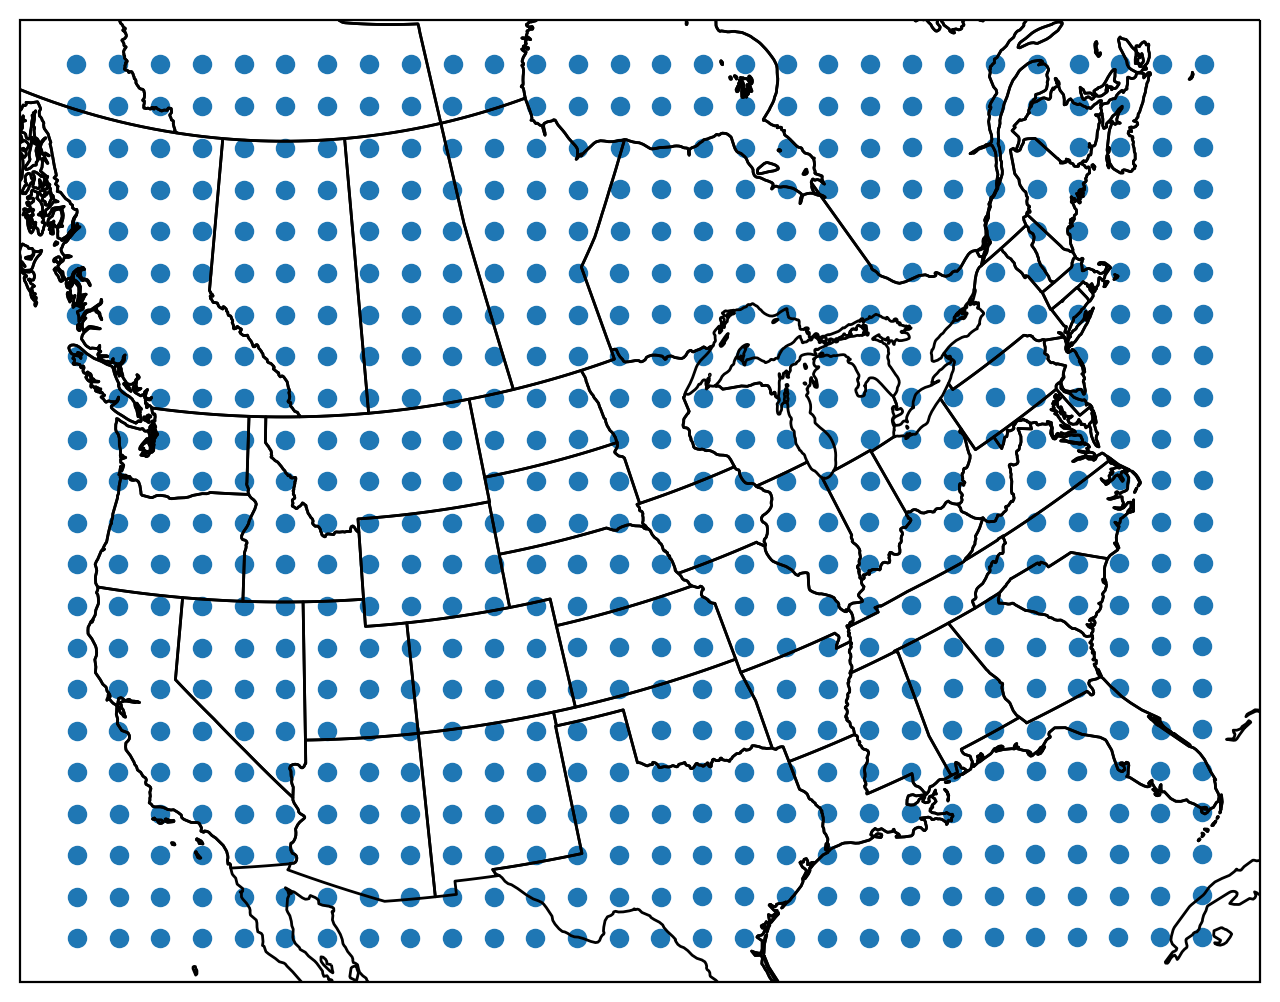

In [9]:
#Create analysis map

proj = ccrs.Stereographic(central_longitude = -115.0, central_latitude = 90.0, true_scale_latitude = 60.0)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)
ax1.scatter(grid_lon.ravel(), grid_lat.ravel(), transform = ccrs.PlateCarree())

In [10]:
#Convert obs lat,lon to x,y. Equations from Appendix A: The Polar Stereographic Map Projection

sig = ((1 + np.sin(phi_0_rad)) / (1 + np.sin(lat_float * (np.pi / 180)))) 
obs_x = e_rad * sig * np.cos(lat_float * (np.pi / 180)) * np.cos((lon_float * (np.pi / 180)) - lam_0_rad) * map_s
obs_y = e_rad * sig * np.cos(lat_float * (np.pi / 180)) * np.sin((lon_float * (np.pi / 180)) - lam_0_rad) * map_s

#Make obs x,y into an array

obs_x = np.array(obs_x)
obs_y = np.array(obs_y)

In [11]:
#Convert obs x,y to lat,lon

obs_lat = (180 / np.pi) * ((np.pi / 2) - (2 * np.arctan(np.sqrt((obs_x / map_s)**2 + (obs_y / map_s)**2) / (e_rad * (1 + np.sin(phi_0_rad)))))) 
obs_lon = np.arctan(obs_y / obs_x) * (180 / np.pi) + lam_0

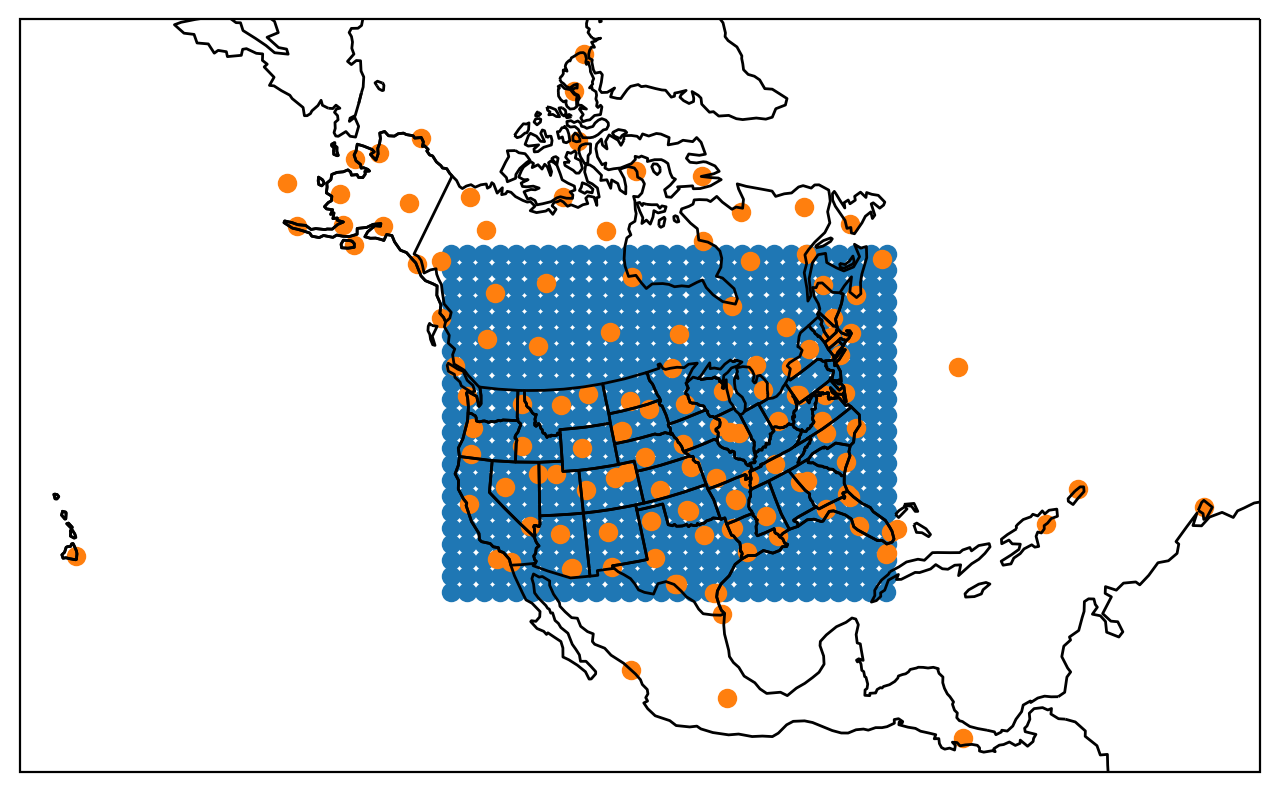

In [12]:
#Plot 500-mb analyses on grid to make sure it is working 

proj = ccrs.Stereographic(central_longitude = -115.0, central_latitude = 90.0, true_scale_latitude = 60.0)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)
ax1.scatter(grid_lon.ravel(), grid_lat.ravel(), transform = ccrs.PlateCarree())
ax1.scatter(lon_float,lat_float, transform = ccrs.PlateCarree())

In [13]:
#Create function for Barnes analysis

#def barnes (d_ik):
    #w = np.exp((-d_ik**2) / (K_d))
    #return w

In [14]:
#Create function for Barnes analysis

def barnes(dik,R):
    if(dik<=R):
        Kd=10.8844524             #(in cm^2)
        w=np.exp((-dik**2)/Kd)
    
    elif(dik>R):
        w=0
    
    else:
        print("NOPE!")
    
    return w

In [15]:
#Find image scale factor and range scale factor

scale_f = (1+np.sin(phi_0_rad))/(1+np.sin((40*np.pi)/180))

range_f = 1.24/scale_f

#Define Schlatter equation

def schlatter(dik):
    rho_dik=0.95*np.exp(-range_f * (dik**2))
    rho_dik[dik==0]=1
    return rho_dik

In [16]:
#Create background from first pass

x_n = 28               #Number of columns
y_n = 22               #Number of rows
re = 12.7775892        #Radius of influence (in cm)
r = np.array([re])
analysis_matrix = np.zeros((x_n,y_n))


for j in range(len(grid_x)):             #Runs through the length of the x grid
    for k in range(len(grid_x[0])):      #Runs through the values of the x grid
        x_dist = grid_x[j,k] - obs_x         
        y_dist = grid_y[j,k] - obs_y         
        radius = ((x_dist**2)+(y_dist**2))**(1/2)  #Pythagoran Theorem to find distance from center
        
        #Make sure obs are within RoI
        
        roi_index = np.where(radius <= r)[0]
        
        #Empty matrix to input weights
        
        weights=np.zeros(len(obs_x))
        
        for i in roi_index:
            w = barnes(radius[i],r)
            weights[i] = w
        analysis_matrix[j,k] = np.sum(weights*obs_ht)/np.sum(weights)    #Used to generate background field for subsequent passes 

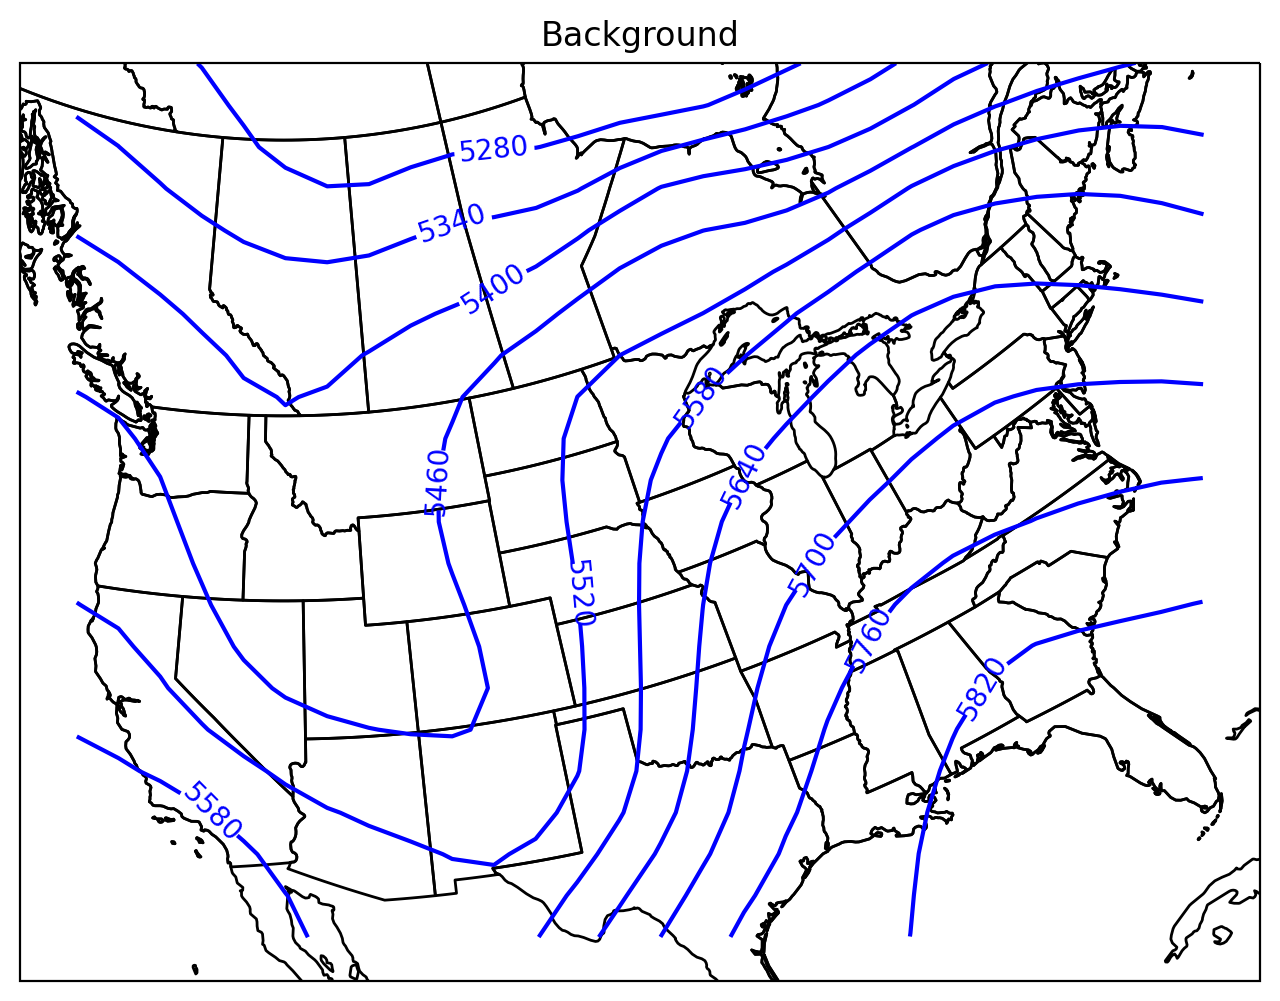

In [17]:
#Plot analyis for background

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,analysis_matrix[:,:],colors = 'b', levels = np.arange(0,8000,60), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("Background")
plt.savefig("Background")
plt.show()

In [18]:
#Create first function for bilinear interpolation

def bilinear1(x, y):
    
    #Create a generic reference grid box for observation locations to be compared to
    
    rel_x = x - int(np.floor(x))                   
    rel_y = y - int(np.floor(y))                
    
    #Define the coordinates for the generic grid box (x_1, y_1), (x_2, y_1), (x_2, y_2), (x_1, y_2)
    
    x_1 = 0                   
    x_2 = 1
    y_1 = 0
    y_2 = 1

    #Thus, the generic grid box has coordinates (0,0), (1,0), (1,1), (0,1)  
    
    delta_x = x_2 - x_1
    delta_y = y_2 - y_1

    #To identify which grid box a given observation is in:
    
    z_1 = analysis_matrix[int(np.floor(y)), int(np.floor(x))]     #Upper-left grid point
    z_2 = analysis_matrix[int(np.ceil(y)), int(np.floor(x))]      #Upper-right grid point
    z_3 = analysis_matrix[int(np.ceil(y)), int(np.ceil(x))]       #Lower-right grid point
    z_4 = analysis_matrix[int(np.floor(y)), int(np.ceil(x))]      #Lower-left grid point
    
    #Enter bilinear interpolation function
    
    P = (1 / (delta_x*delta_y)) * ((rel_x - x_2)*(rel_y - y_2)*(z_1) - (rel_x - x_1)*(rel_y - y_2)*(z_2) + (rel_x - x_1)*(rel_y - y_1)*(z_3) - (rel_x - x_2)*(rel_y - y_1)*(z_4))
    
    return P

In [19]:
#Second pass

#Setup for the second pass
ind_x = ((obs_x - x_0)/del_x)              #Used to find the relative x-coordinate of a given observation within a grid box
ind_y = ((obs_y - y_0)/del_y)              #Used to find the relative y-coordinate of a given observation within a grid box

P1 = np.zeros(len(obs_x))                  #Create an empty array for bilinear interpolation

#Use bilinear if the observation is within the grid. If the observation is not within the grid, use a "reverse" Barnes analysis
#Reverse Barnes uses the observation point (instead of the analysis point) as the center point 

for i in range(len(ind_x)):
    if (ind_x[i] >= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):      #To only utilize observations within the grid, use bilinear
        p = bilinear1(ind_x[i], ind_y[i])                                              
    else:
        x_dist = obs_x[i] - grid_x                        #Observation not in grid, use reverse Barnes
        y_dist = obs_y[i] - grid_y                        #Observation not in grid, use reverse Barnes 
        radius = ((x_dist)**2 + (y_dist)**2)**(1/2)
        impt_vals_r = np.where(radius <= r)
        weights_r = np.zeros(grid_x.shape)                  #Make the grid
        for j in impt_vals_r[0]:                            #Observations within RoI
            for k in impt_vals_r[1]:                        #Observations within RoI
                barnes_r = barnes(radius[j,k],r)
                weights_r[j,k] = barnes_r
        p = np.sum(weights_r * analysis_matrix[:,:]) / np.sum(weights_r)   #Uses first pass as the background
       
    P1[i] = p

/var/folders/6m/5jy3kjwx3bg9cqnkh8mr3j1h0000gn/T/ipykernel_14660/4047354015.py:25: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weights_r * analysis_matrix[:,:]) / np.sum(weights_r)   #Uses first pass as the background


In [20]:
#Perform three analyses using N = 2, 4, and 10

N=[2,4,10]
analysis_matrixN = np.zeros((x_n, y_n, len(N)))

for n in range(len(N)):
    stations = N[n]
    for j in range(len(grid_x)):             #Runs through the length of the x grid
        for k in range(len(grid_x[0])):      #Runs through the values of the x grid
            x_dist = grid_x[j,k] - obs_x         
            y_dist = grid_y[j,k] - obs_y         
            radius = ((x_dist**2)+(y_dist**2))**(1/2)  #Pythagoran Theorem to find distance from center
            new_r = radius*0.15                        #To get thousands of km
            
            #Move 2, 4 or 10 closest obs into a list
            
            inds_sorted = np.argsort(new_r)
            needed_xob = obs_x[inds_sorted[:stations]]
            needed_yob = obs_y[inds_sorted[:stations]]
            needed_height = obs_ht[inds_sorted[:stations]]
            needed_distance= new_r[inds_sorted[:stations]]
            needed_bilinear= P1[inds_sorted[:stations]]
            
            #Calculate correlation and distance between obs and obs
           
            cor_matrix = np.zeros((stations,stations))
            distcor_matrix=np.zeros((stations,stations))
            
            #Correlation gives a-posteriori weights
            
            for i in range(len(needed_xob)):
                dik = (np.sqrt(((needed_xob[i]-needed_xob)**2)+(needed_yob[i]-needed_yob)**2))
                
                #Obs to obs correlation
                
                cor_matrix[i] = schlatter(dik*0.15)
                
            #Calculate correlation between analysis and obs
               
            distcor_matrix = np.matrix(schlatter(needed_distance)).T
            
            #Calculate weights
            
            weights=np.array(np.linalg.inv(cor_matrix)*distcor_matrix).flatten()   #.flatten returns a copy of the array reduced into one dimension
            analysis_matrixN[j,k,n] = analysis_matrix[j,k] + np.nansum(weights * (needed_height - needed_bilinear))

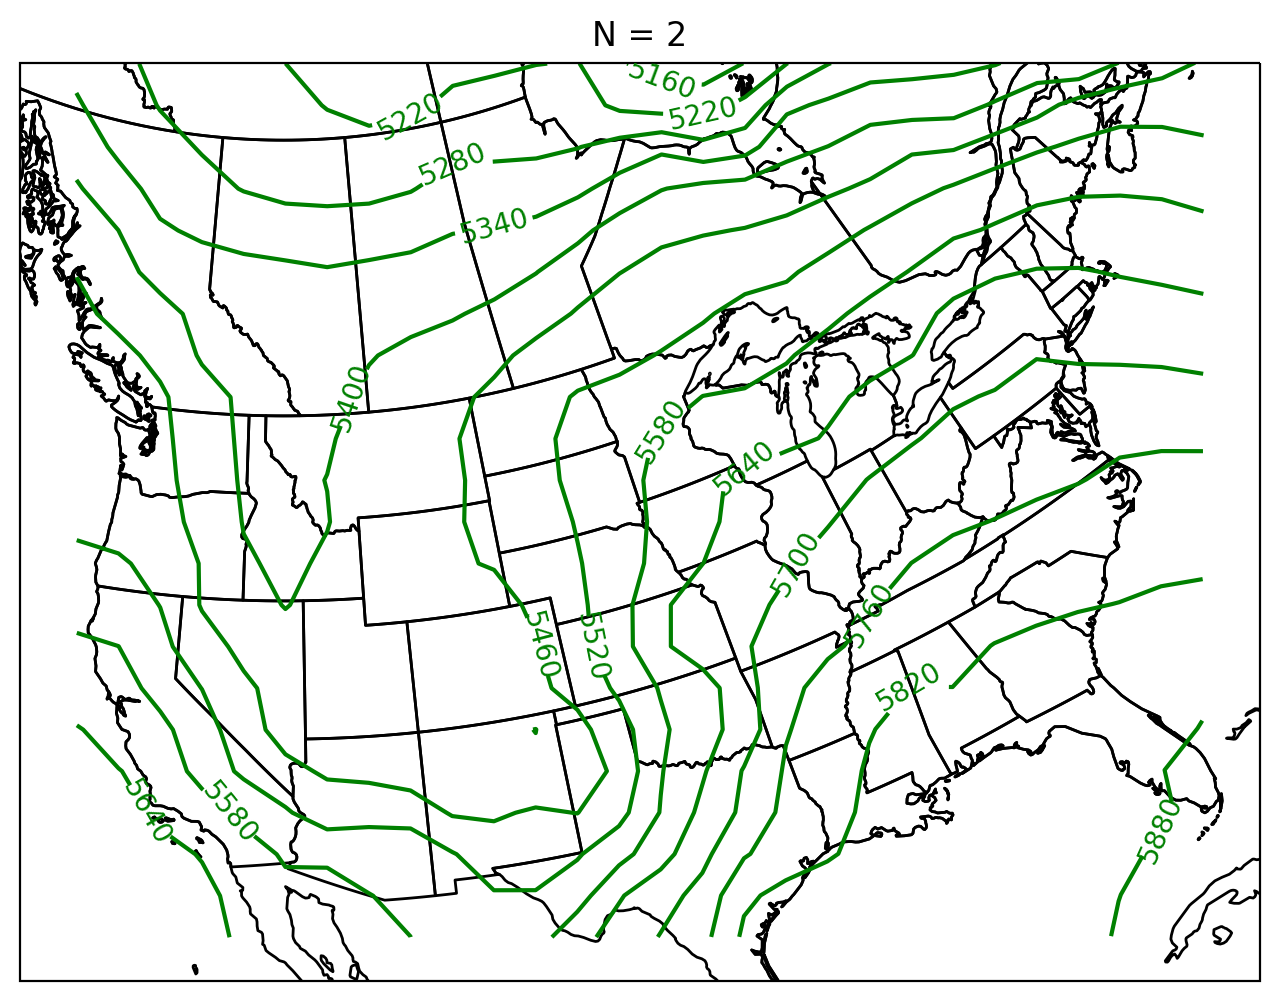

In [21]:
#Plot analysis where N = 2

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,analysis_matrixN[:,:,0],colors = 'g', levels = np.arange(0,8000,60), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("N = 2")
plt.savefig("N = 2")
plt.show()

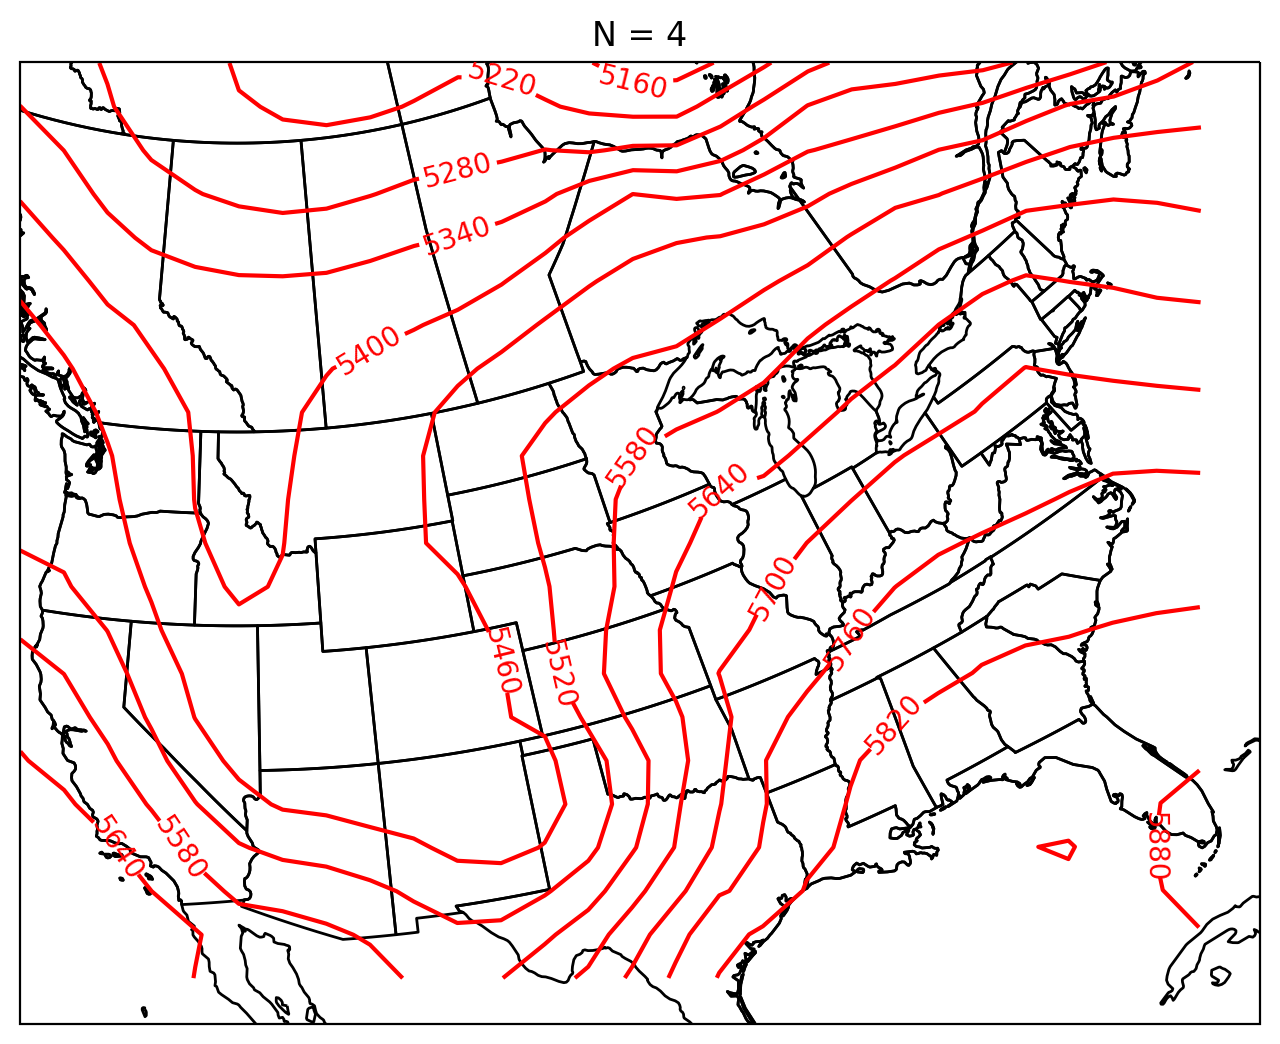

In [22]:
#Plot analysis where N = 4

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,analysis_matrixN[:,:,1],colors = 'r', levels = np.arange(0,8000,60), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("N = 4")
plt.savefig("N = 4")
plt.show()

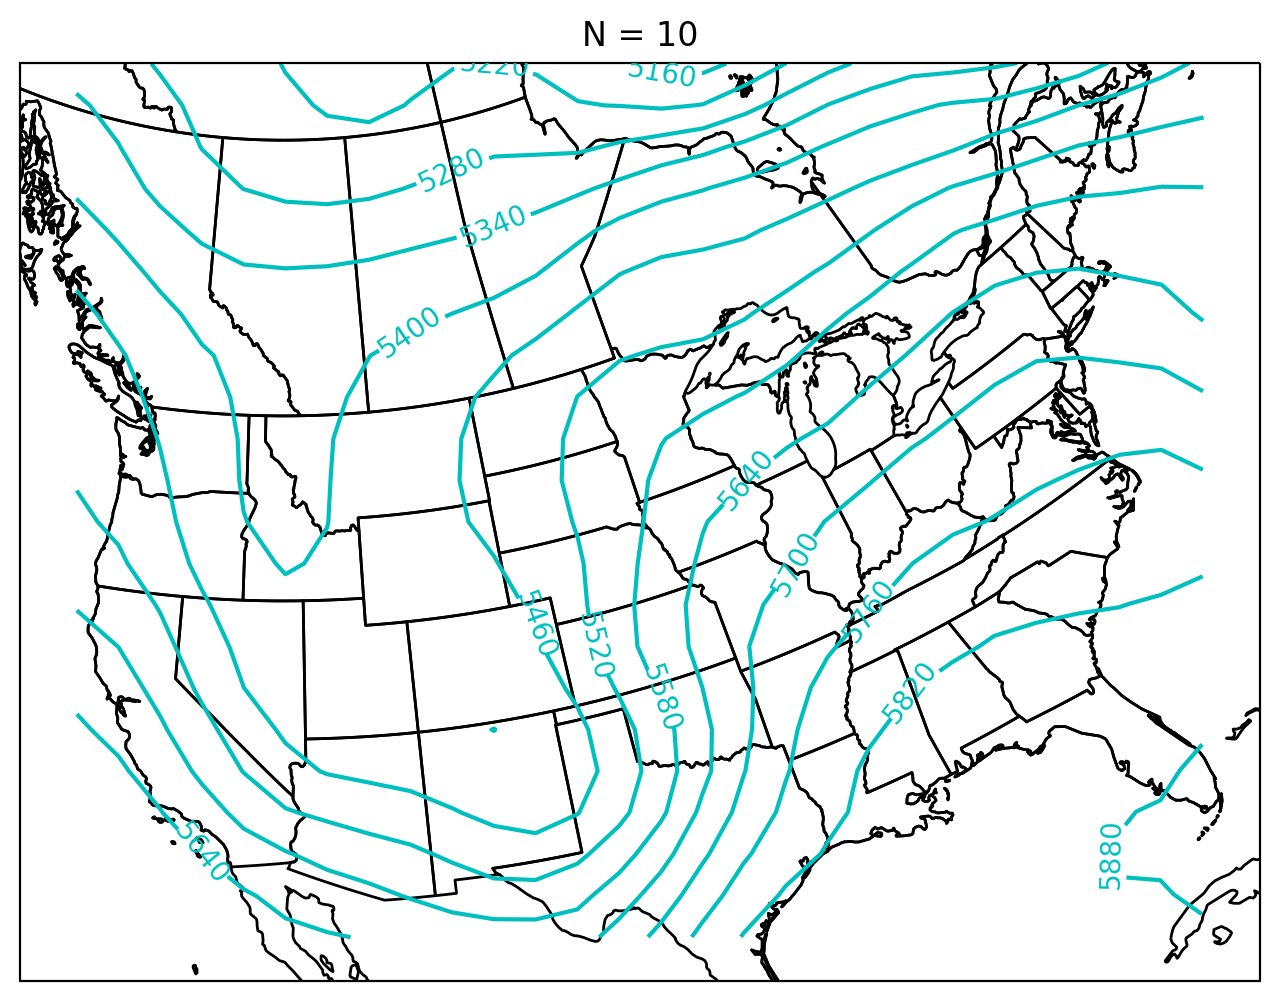

In [23]:
#Plot analysis where N = 10

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,analysis_matrixN[:,:,2],colors = 'c', levels = np.arange(0,8000,60), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(0,8000,60))
plt.title("N = 10")
plt.savefig("N = 10")
plt.show()

In [24]:
#Analysis increment = f_a(r_i) - f_b(r_i) ==> (analysis at analysis location - background at analysis location)

N2anal_inc = analysis_matrixN[:,:,0] - analysis_matrix[:,:]
N4anal_inc = analysis_matrixN[:,:,1] - analysis_matrix[:,:]
N10anal_inc = analysis_matrixN[:,:,2] - analysis_matrix[:,:]

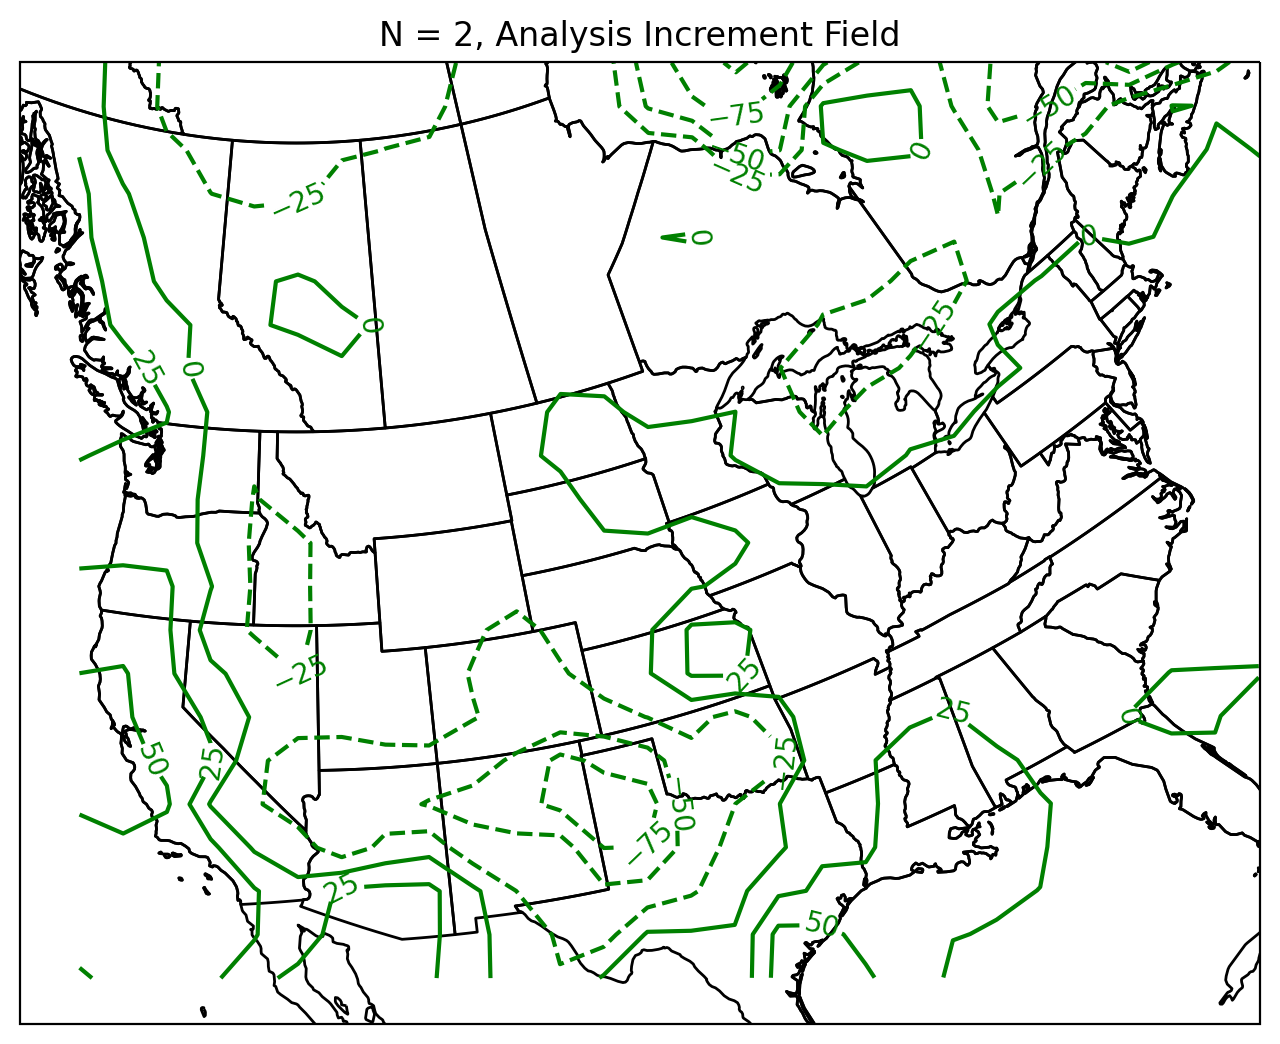

In [25]:
#Plot N = 2 analysis increment field

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,N2anal_inc, colors = 'g', levels = np.arange(-8000,8000,25), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(-8000,8000,25))
plt.title("N = 2, Analysis Increment Field")
plt.savefig('N2anal_inc')
plt.show()

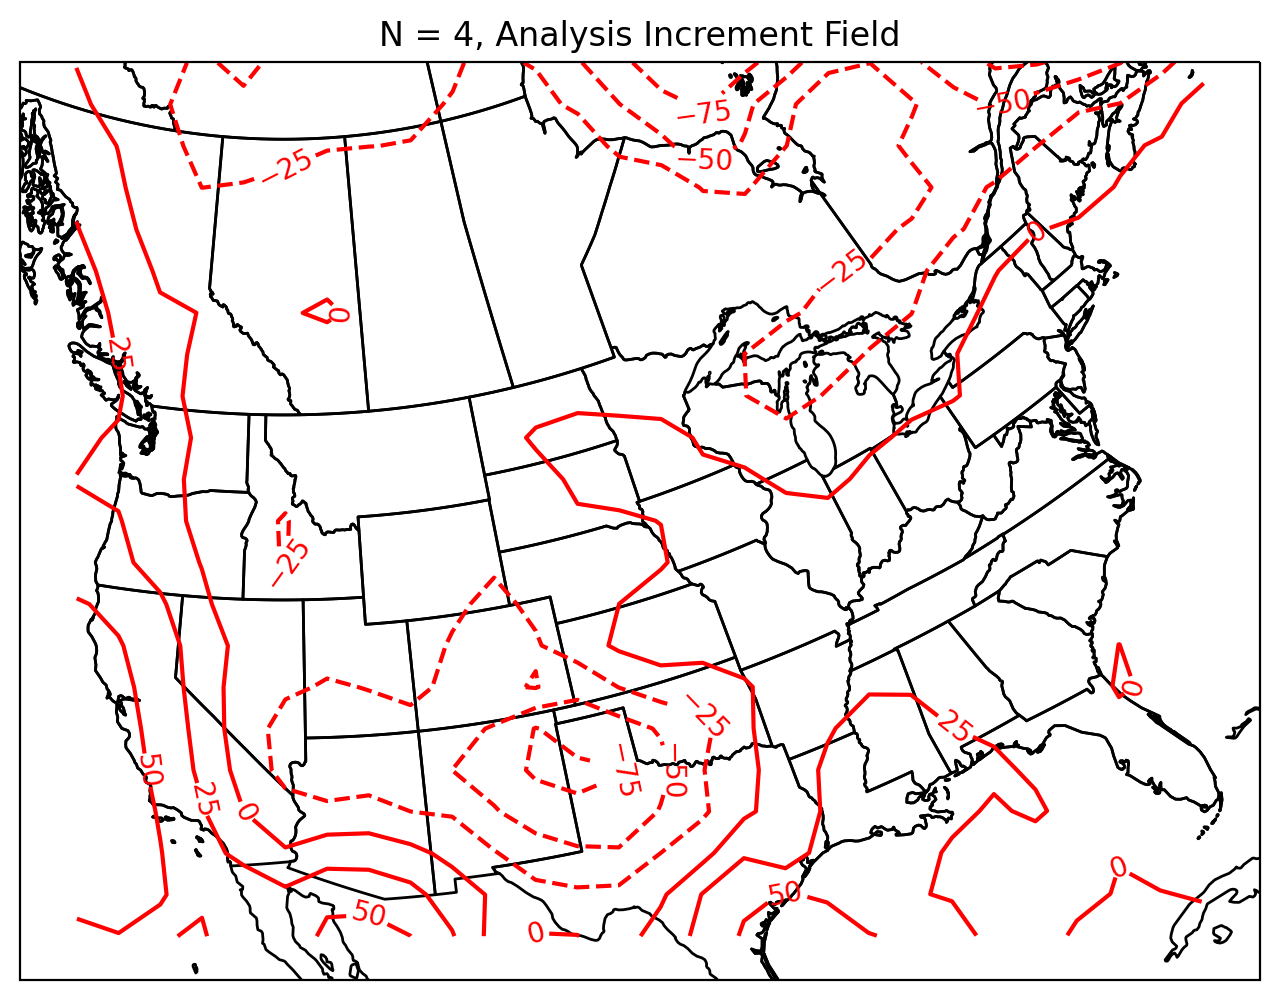

In [26]:
#Plot N = 4 analysis increment field

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,N4anal_inc, colors = 'r', levels = np.arange(-8000,8000,25), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(-8000,8000,25))
plt.title("N = 4, Analysis Increment Field")
plt.savefig('N4anal_inc')
plt.show()

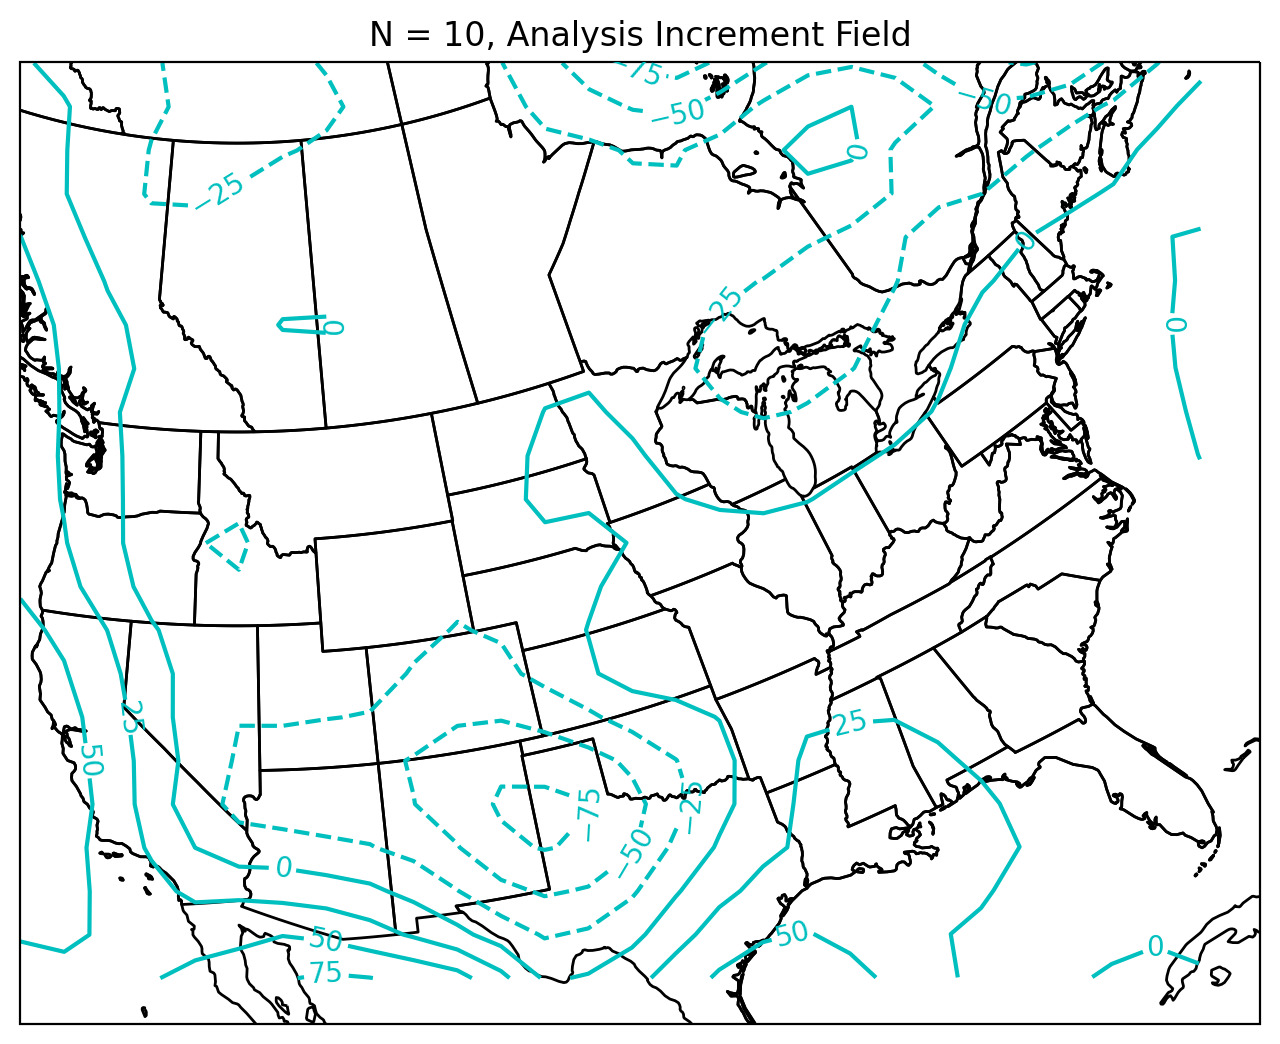

In [27]:
#Plot N = 10 analysis increment field

proj = ccrs.Stereographic(central_longitude = -115, central_latitude = 90, true_scale_latitude = 60)
fig = plt.figure(figsize = (8,8), dpi = 200)
ax1 = fig.add_subplot(111,projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

cs1 = ax1.contour(grid_lon,grid_lat,N10anal_inc, colors = 'c', levels = np.arange(-8000,8000,25), transform = ccrs.PlateCarree())
plt.clabel(cs1,levels = np.arange(-8000,8000,25))
plt.title("N = 10, Analysis Increment Field")
plt.savefig('N10anal_inc')
plt.show()

In [28]:
#Create second function for bilinear interpolation

def bilinear2(x, y, N):
    
    #Create a generic reference grid box for observation locations to be compared to
    
    rel_x = x - int(np.floor(x))                   
    rel_y = y - int(np.floor(y))                
    
    #Define the coordinates for the generic grid box (x_1, y_1), (x_2, y_1), (x_2, y_2), (x_1, y_2)
    
    x_1 = 0                   
    x_2 = 1
    y_1 = 0
    y_2 = 1

    #Thus, the generic grid box has coordinates (0,0), (1,0), (1,1), (0,1)  
    
    delta_x = x_2 - x_1
    delta_y = y_2 - y_1

    #To identify which grid box a given observation is in:
    
    z_1 = analysis_matrixN[int(np.floor(y)), int(np.floor(x)), N]     #Upper-left grid point
    z_2 = analysis_matrixN[int(np.ceil(y)), int(np.floor(x)), N]      #Upper-right grid point
    z_3 = analysis_matrixN[int(np.ceil(y)), int(np.ceil(x)), N]       #Lower-right grid point
    z_4 = analysis_matrixN[int(np.floor(y)), int(np.ceil(x)), N]      #Lower-left grid point
    
    #Enter bilinear interpolation function
    
    P = (1 / (delta_x*delta_y)) * ((rel_x - x_2)*(rel_y - y_2)*(z_1) - (rel_x - x_1)*(rel_y - y_2)*(z_2) + (rel_x - x_1)*(rel_y - y_1)*(z_3) - (rel_x - x_2)*(rel_y - y_1)*(z_4))
    
    return P

In [29]:
#Analysis difference when N = 2

ind_x = ((obs_x - x_0)/del_x)              #Used to find the relative x-coordinate of a given observation within a grid box
ind_y = ((obs_y - y_0)/del_y)              #Used to find the relative y-coordinate of a given observation within a grid box

P2 = np.zeros(len(obs_x))                  #Create an empty array for bilinear interpolation

#Use bilinear if the observation is within the grid. If the observation is not within the grid, use a "reverse" Barnes analysis
#Reverse Barnes uses the observation point (instead of the analysis point) as the center point 

for i in range(len(ind_x)):
    if (ind_x[i] >= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):      #To only utilize observations within the grid, use bilinear
        p = bilinear2(ind_x[i], ind_y[i],0)                                              
    else:
        x_dist = obs_x[i] - grid_x                        #Observation not in grid, use reverse Barnes
        y_dist = obs_y[i] - grid_y                        #Observation not in grid, use reverse Barnes 
        radius = ((x_dist)**2 + (y_dist)**2)**(1/2)
        impt_vals_r = np.where(radius <= r)
        weights_r = np.zeros(grid_x.shape)                  #Make the grid
        for j in impt_vals_r[0]:                            #Observations within RoI
            for k in impt_vals_r[1]:                        #Observations within RoI
                barnes_r = barnes(radius[j,k],r)
                weights_r[j,k] = barnes_r
        p = np.nansum(weights_r * analysis_matrixN[:,:,0]) / np.nansum(weights_r)   #Uses first pass as the background
       
    P2[i] = p 

/var/folders/6m/5jy3kjwx3bg9cqnkh8mr3j1h0000gn/T/ipykernel_14660/1441263139.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = np.nansum(weights_r * analysis_matrixN[:,:,0]) / np.nansum(weights_r)   #Uses first pass as the background


In [30]:
#Analysis difference when N = 4

ind_x = ((obs_x - x_0)/del_x)              #Used to find the relative x-coordinate of a given observation within a grid box
ind_y = ((obs_y - y_0)/del_y)              #Used to find the relative y-coordinate of a given observation within a grid box

P3 = np.zeros(len(obs_x))                  #Create an empty array for bilinear interpolation

#Use bilinear if the observation is within the grid. If the observation is not within the grid, use a "reverse" Barnes analysis
#Reverse Barnes uses the observation point (instead of the analysis point) as the center point 

for i in range(len(ind_x)):
    if (ind_x[i] >= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):      #To only utilize observations within the grid, use bilinear
        p = bilinear2(ind_x[i], ind_y[i],1)                                              
    else:
        x_dist = obs_x[i] - grid_x                        #Observation not in grid, use reverse Barnes
        y_dist = obs_y[i] - grid_y                        #Observation not in grid, use reverse Barnes 
        radius = ((x_dist)**2 + (y_dist)**2)**(1/2)
        impt_vals_r = np.where(radius <= r)
        weights_r = np.zeros(grid_x.shape)                  #Make the grid
        for j in impt_vals_r[0]:                            #Observations within RoI
            for k in impt_vals_r[1]:                        #Observations within RoI
                barnes_r = barnes(radius[j,k],r)
                weights_r[j,k] = barnes_r
        p = np.nansum(weights_r * analysis_matrixN[:,:,1]) / np.nansum(weights_r)   #Uses first pass as the background
       
    P3[i] = p 

/var/folders/6m/5jy3kjwx3bg9cqnkh8mr3j1h0000gn/T/ipykernel_14660/3542341108.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = np.nansum(weights_r * analysis_matrixN[:,:,1]) / np.nansum(weights_r)   #Uses first pass as the background


In [31]:
#Analysis difference when N = 10

ind_x = ((obs_x - x_0)/del_x)              #Used to find the relative x-coordinate of a given observation within a grid box
ind_y = ((obs_y - y_0)/del_y)              #Used to find the relative y-coordinate of a given observation within a grid box

P4 = np.zeros(len(obs_x))                  #Create an empty array for bilinear interpolation

#Use bilinear if the observation is within the grid. If the observation is not within the grid, use a "reverse" Barnes analysis
#Reverse Barnes uses the observation point (instead of the analysis point) as the center point 

for i in range(len(ind_x)):
    if (ind_x[i] >= 0) and (ind_x[i] < 21) and (ind_y[i] >= 0) and (ind_y[i] < 27):      #To only utilize observations within the grid, use bilinear
        p = bilinear2(ind_x[i], ind_y[i],2)                                              
    else:
        x_dist = obs_x[i] - grid_x                        #Observation not in grid, use reverse Barnes
        y_dist = obs_y[i] - grid_y                        #Observation not in grid, use reverse Barnes 
        radius = ((x_dist)**2 + (y_dist)**2)**(1/2)
        impt_vals_r = np.where(radius <= r)
        weights_r = np.zeros(grid_x.shape)                  #Make the grid
        for j in impt_vals_r[0]:                            #Observations within RoI
            for k in impt_vals_r[1]:                        #Observations within RoI
                barnes_r = barnes(radius[j,k],r)
                weights_r[j,k] = barnes_r
        p = np.nansum(weights_r * analysis_matrixN[:,:,2]) / np.nansum(weights_r)   #Uses first pass as the background
       
    P4[i] = p 

/var/folders/6m/5jy3kjwx3bg9cqnkh8mr3j1h0000gn/T/ipykernel_14660/2656416351.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = np.nansum(weights_r * analysis_matrixN[:,:,2]) / np.nansum(weights_r)   #Uses first pass as the background


In [32]:
#Calculate RMS values

#N = 2

diff1 = (obs_ht - P2)**2
diff1 = diff1[~np.isnan(diff1)]
rms1 = np.sqrt(np.sum(diff1)/len(diff1))

#N = 4

diff2 = (obs_ht - P3)**2
diff2 = diff2[~np.isnan(diff2)]
rms2 = np.sqrt(np.sum(diff2)/len(diff2))

#N = 10

diff3 = (obs_ht - P4)**2
diff3 = diff3[~np.isnan(diff3)]
rms3 = np.sqrt(np.sum(diff3)/len(diff3))

#RMS array

rms_arr = [rms1, rms2, rms3]
print(rms_arr)

[51.91923052583817, 49.9606106745329, 50.97242487632062]


In [33]:
#Store analyses in text files

a_file = open("Analysis_MatrixN_2", "w")
for line in analysis_matrixN[:,:,0]:
    np.savetxt(a_file, line)
a_file.close()

b_file = open("Analysis_MatrixN_4", "w")
for line in analysis_matrixN[:,:,1]:
    np.savetxt(b_file, line)
b_file.close()
    
c_file = open("Analysis_MatrixN_10", "w")
for line in analysis_matrixN[:,:,2]:
    np.savetxt(c_file, line)
c_file.close()

In [34]:
#Store the analysis increment fields in text files

d_file = open("N2anal_inc", "w")
for line in N2anal_inc:
    np.savetxt(d_file, line)
d_file.close()
    
e_file = open("N4anal_inc", "w")
for line in N4anal_inc:
    np.savetxt(e_file, line)
e_file.close()
    
f_file = open("N10anal_inc", "w")
for line in N10anal_inc:
    np.savetxt(f_file, line)
f_file.close()

In [35]:
#Store the analysis differences in text files

g_file = np.savetxt("N2anal_diff", P2)
    
h_file = np.savetxt("N4anal_diff", P3)
    
i_file = np.savetxt("N10anal_diff", P4)

In [36]:
#Store RMS values in text file

np.savetxt("RMS_arr.txt", rms_arr)